In [31]:
# Importing Libraries in python
import numpy as np
import pandas as pd
import cv2
import os
from matplotlib import pyplot as plt
from PIL import Image
import random
import keras
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [32]:
# import dataset
df = pd.read_csv("train.csv")
base_path = ".\\images\\"

In [33]:
df

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7
...,...,...
1580465,72c3b1c367e3d559,203092
1580466,7a6a2d9ea92684a6,203092
1580467,9401fad4c497e1f9,203092
1580468,aacc960c9a228b5f,203092


In [34]:
# df = df.loc[df["id"].str.startswith("00", na = False), :]
num_classes = len(df["landmark_id"].unique())
num_data = len(df)
num_data

1580470

In [35]:
num_classes

81313

In [36]:
data = pd.DataFrame(df["landmark_id"].value_counts())
data.reset_index(inplace = True)

In [37]:
data

,landmark_id,count
0,138982,6272
1,126637,2231
2,20409,1758
3,83144,1741
4,113209,1135
...,...,...
81308,84677,2
81309,36989,2
81310,133688,2
81311,17316,2


In [38]:
data['count'].describe()

count    81313.000000
mean        19.436867
std         42.877489
min          2.000000
25%          5.000000
50%          9.000000
75%         20.000000
max       6272.000000
Name: count, dtype: float64

(array([   0.,    0.,    0.,    0.,    0.,    0., 4750.,    0.,    0.,
        4241.,    0.,    0., 8306.,    0.,    0., 6974.,    0.,    0.,
        5571.,    0.,    0., 4559.,    0.,    0.,    0., 3843.,    0.,
           0., 3393.,    0.,    0., 3009.,    0.,    0., 2622.,    0.,
           0., 2265.,    0.,    0., 2110.,    0.,    0., 1914.,    0.,
           0., 1649.,    0.,    0.,    0., 1577.,    0.,    0., 1356.,
           0.,    0., 1247.,    0.,    0., 1196.,    0.,    0., 1038.,
           0.,    0.,  980.,    0.,    0.,  949.,    0.,    0.,  837.,
           0.,    0.,    0.,  785.,    0.,    0.,  690.,    0.,    0.,
         691.,    0.,    0.,  621.,    0.,    0.,  545.,    0.,    0.,
         577.,    0.,    0.,  538.,    0.,    0.,  500.,    0.,    0.,
         482.]),
 array([ 0.  ,  0.32,  0.64,  0.96,  1.28,  1.6 ,  1.92,  2.24,  2.56,
         2.88,  3.2 ,  3.52,  3.84,  4.16,  4.48,  4.8 ,  5.12,  5.44,
         5.76,  6.08,  6.4 ,  6.72,  7.04,  7.36,  7.68,  8.

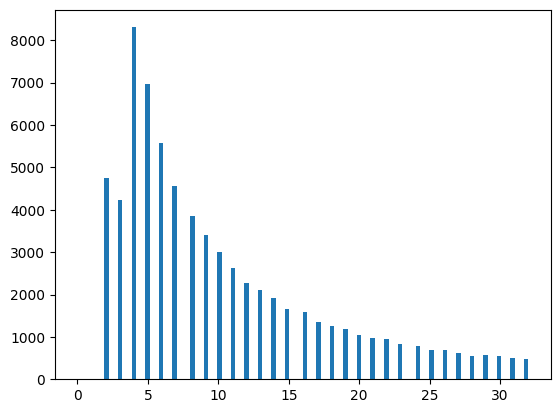

In [39]:
plt.hist(data['count'], 100, range = (0, 32), label = 'test')

In [10]:
lencoder = LabelEncoder()
lencoder.fit(df["landmark_id"])

LabelEncoder()

In [11]:
df

,id,landmark_id
119,00cba0067c078490,27
120,00f928e383e1d121,27
796,009ecdb56b5e9adb,60
1089,00d5d47528839144,124
1133,00e9003a381ab809,134
...,...,...
1578695,0064ecfae82480a0,202886
1579525,0006bd092b119041,202939
1579599,00b7015e96e32c1a,202950
1579715,001e45514ceb27c9,202972


In [12]:
def encoder_label(lbl):
    return lencoder.transform(lbl)

In [13]:
def decode_label(lbl):
    return lencoder.inverse_transform(lbl)

In [14]:
def get_image_from_num(num, df):
    fname, label = df.iloc[num, :]
    fname = fname + '.jpg'
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    path = os.path.join(f1, f2, f3, fname)
    im = cv2.imread(os.path.join(base_path, path))
    return im, label

4 sample images


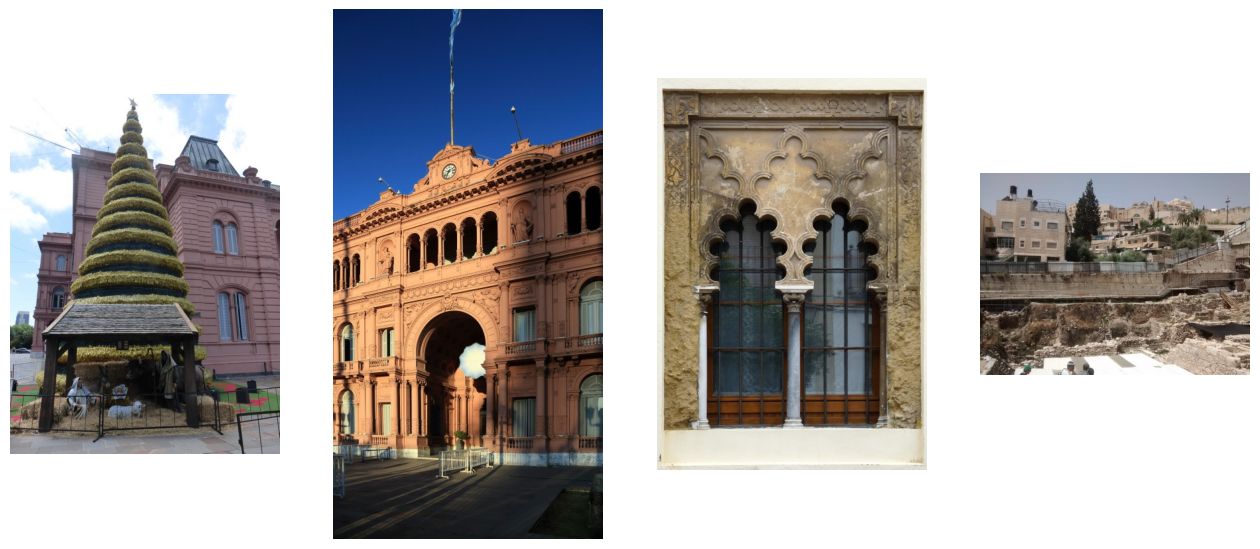

In [15]:
print("4 sample images")
fig = plt.figure(figsize = (16,16))
for i in range(1,5):
    ri = random.choices(os.listdir(base_path), k = 3)
    folder = base_path + '/' + ri[0] + '/' + ri[1] + '/' + ri[2]
    random_img = random.choice(os.listdir(folder))
    img = np.array(Image.open(folder + '/' + random_img))
    fig.add_subplot(1, 4, i)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [16]:
#builidng the model
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras import Sequential
from keras.optimizers import RMSprop

In [17]:
#Parameters
learning_rate = 0.0001
decay_speed = 1e-6
momentum = 0.09
loss_function = "sparse_categorical_crossentropy"
source_model = VGG19(weights = None)
drop_layer = Dropout(0.5)
drop_layer2 = Dropout(0.5)

In [18]:
model = Sequential()
for layer in source_model.layers[:-1]:
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)
model.add(Dense(num_classes, activation="softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 224, 224, 3)       12        
 Normalization)                                                  
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                        

In [20]:
optim1 = keras.optimizers.RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optim1, loss=loss_function, metrics=['accuracy'])

In [21]:
def image_resize(im, target_size):
    return cv2.resize(im, target_size)

In [22]:
def get_batch(dataframe, start, batch_size):
    image_array = []
    label_array = []
    
    last_img = start + batch_size
    if last_img > len(dataframe):
        last_img = len(dataframe)
        
    for idx in range(start, last_img):
        im, label = get_image_from_num(idx, dataframe)
        im = image_resize(im, (224, 224)) / 255.0
        
        image_array.append(im)
        label_array.append(label)
        
    label_array = encoder_label(label_array)
    
    return np.array(image_array), np.array(label_array)

In [23]:
batch_size = 16
epoch_shuffle = True
weight_classes = True
epochs = 1

train, val = np.split(df.sample(frac=1), [int(0.8*len(df))])

In [24]:
len(train)

4896

In [25]:
len(val)

1224

In [26]:
for e in range(epochs):
    print("Epochs" + str(e+1) + "/" + str(epochs))
    if epoch_shuffle:
        train = train.sample(frac = 1)
    for it in range(int(np.ceil(len(train)/batch_size))):
        X_train, y_train = get_batch(train, it*batch_size, batch_size)
        
        model.train_on_batch(X_train, y_train)

model.save("Model")

Epochs1/1
INFO:tensorflow:Assets written to: Model\assets


INFO:tensorflow:Assets written to: Model\assets


In [27]:
# Test
batch_size = 16

errors = 0
good_pred = []
bad_pred = []

for it in range(int(np.ceil(len(val)/batch_size))):
    X_val, y_val = get_batch(val, it * batch_size, batch_size)
    
    result = model.predict(X_val)
    cla = np.argmax(result, axis = 1)
    for idx, res in enumerate(result):
        if cla[idx] != y_val[idx]:
            errors += 1
            bad_pred.append([batch_size*it + idx, cla[idx], res[cla[idx]]])
        else:
            good_pred.append([batch_size*it + idx, cla[idx], res[cla[idx]]])

1/1 [==============================] - 1s 801ms/step


In [28]:
good_pred = np.array(good_pred)
good_pred = np.array(sorted(good_pred, key = lambda x: x[2], reverse = True))
good_pred

array([[1.20100000e+03, 3.63600000e+03, 1.94404711e-04],
       [9.13000000e+02, 3.63600000e+03, 1.94399763e-04],
       [3.25000000e+02, 3.63600000e+03, 1.94392720e-04],
       [3.67000000e+02, 3.63600000e+03, 1.94390435e-04]])

IndexError: index 4 is out of bounds for axis 0 with size 4

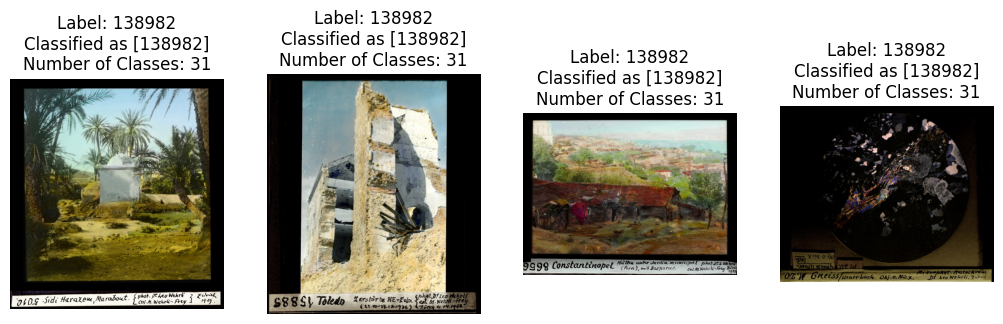

In [29]:
fig = plt.figure(figsize=(16, 16))

for i in range(1, 6):
    n = int(good_pred[i - 1][0])
    img, lbl = get_image_from_num(n, val)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax = fig.add_subplot(1, 5, i)
    ax.imshow(img)
    lbl2 = np.array([int(good_pred[i - 1][1])])
    decoded_label = decode_label(lbl2)
    sample_cnt = list(df.landmark_id).count(lbl)
    ax.set_title("Label: " + str(lbl) + "\nClassified as " + str(decode_label(lbl2)) + "\nNumber of Classes: " + str(sample_cnt))
    ax.axis('off')

plt.show()


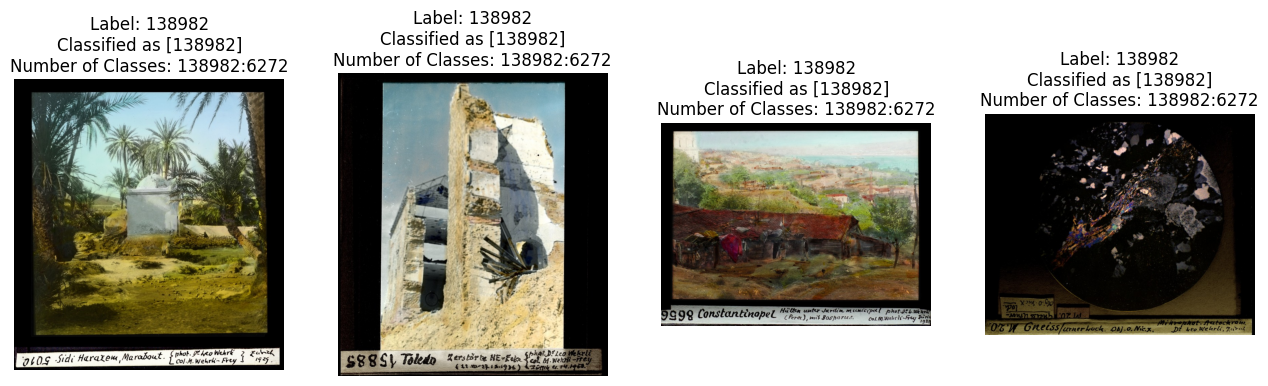

In [41]:
fig = plt.figure(figsize=(16, 16))

for i in range(4):
    n = int(good_pred[i][0])
    img, lbl = get_image_from_num(n, val)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(img)
    lbl2 = np.array([int(good_pred[i][1])])
    decoded_label = decode_label(lbl2)
    sample_cnt = list(df.landmark_id).count(lbl)
    ax.set_title("Label: " + str(lbl) + "\nClassified as " + str(decode_label(lbl2)) + "\nNumber of Classes: " + str(lbl) + ':' + str(sample_cnt))
    ax.axis('off')

plt.show()


In [42]:
errors

1220

In [43]:
bad_pred


[[0, 3636, 0.000194374],
 [1, 3636, 0.00019438923],
 [2, 3636, 0.00019438993],
 [3, 3636, 0.00019439154],
 [4, 3636, 0.00019438998],
 [5, 3636, 0.00019440523],
 [6, 3636, 0.00019440091],
 [7, 3636, 0.00019439499],
 [8, 3636, 0.00019438782],
 [9, 3636, 0.00019441494],
 [10, 3636, 0.00019437778],
 [11, 3636, 0.00019439538],
 [12, 3636, 0.00019439684],
 [13, 3636, 0.00019437648],
 [14, 3636, 0.0001943781],
 [15, 3636, 0.00019437965],
 [16, 3636, 0.00019436813],
 [17, 3636, 0.00019440615],
 [18, 3636, 0.00019439941],
 [19, 3636, 0.00019438847],
 [20, 3636, 0.00019438568],
 [21, 3636, 0.0001943905],
 [22, 3636, 0.00019439387],
 [23, 3636, 0.00019439767],
 [24, 3636, 0.00019439643],
 [25, 3636, 0.00019436826],
 [26, 3636, 0.00019438693],
 [27, 3636, 0.00019437438],
 [28, 3636, 0.00019438895],
 [29, 3636, 0.00019439113],
 [30, 3636, 0.00019438847],
 [31, 3636, 0.00019437744],
 [32, 3636, 0.00019440557],
 [33, 3636, 0.00019439864],
 [34, 3636, 0.00019440452],
 [35, 3636, 0.0001943729],
 [36, 3